In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from scipy.stats import ks_2samp
%matplotlib inline
plt.style.use('ggplot')

In [9]:
mimic_hm = pd.read_csv("tableone_result.csv", names=['Features', 'ICU_mortality=0', 'ICU_mortality=1', '#missing value',
                                                       'pval', 'test name'])

data_columns = mimic_hm.columns.values[1:]

In [10]:
mimic_hm

,Features,ICU_mortality=0,ICU_mortality=1,#missing value,pval,test name
0,n,537,120,0.0,NaN,NaN
1,age (median [IQR]),"65.90 [54.12,78.49]","67.68 [54.41,78.25]",0.0,0.558,Kruskal-Wallis
2,sofa (median [IQR]),"4.00 [3.00,7.00]","9.00 [6.00,12.25]",0.0,0.000,Kruskal-Wallis
3,wbc (median [IQR]),"7.30 [2.90,14.00]","10.70 [2.65,17.18]",4.0,0.075,Kruskal-Wallis
4,hemoglobin (median [IQR]),"9.50 [8.33,10.90]","9.60 [8.50,11.00]",3.0,0.678,Kruskal-Wallis
5,platelet (median [IQR]),"121.00 [50.25,228.75]","74.00 [33.00,186.00]",4.0,0.005,Kruskal-Wallis
6,sodium (median [IQR]),"137.00 [134.00,140.00]","137.00 [133.00,141.00]",4.0,0.250,Kruskal-Wallis
7,potassium (median [IQR]),"4.00 [3.60,4.40]","4.20 [3.70,4.80]",4.0,0.006,Kruskal-Wallis
8,creatinine (median [IQR]),"88.42 [61.89,141.47]","114.95 [70.74,159.16]",4.0,0.019,Kruskal-Wallis
9,bilirubin (median [IQR]),"11.97 [6.84,22.23]","17.10 [9.41,31.64]",122.0,0.001,Kruskal-Wallis


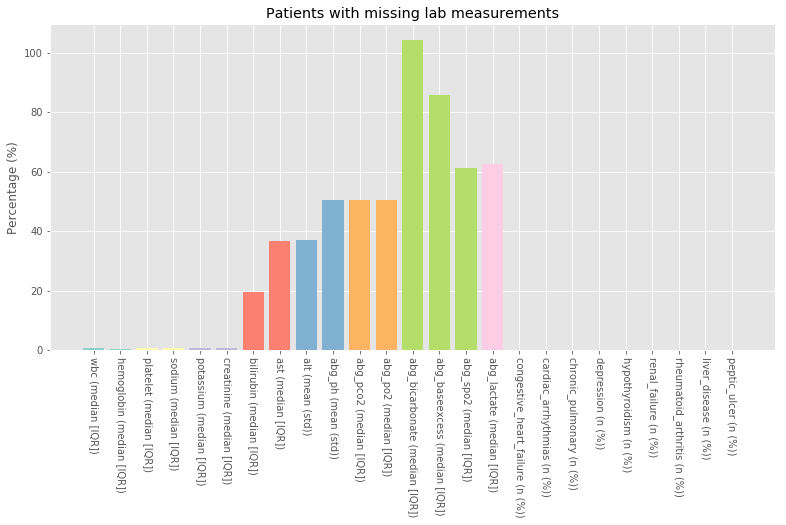

In [11]:
x = np.arange(mimic_hm['#missing value'].dropna()[mimic_hm['#missing value']!=0].shape[0])
color_list = plt.cm.Set3(np.linspace(0, 1, len(x)))
y = mimic_hm['#missing value'].dropna()[mimic_hm['#missing value']!=0] / 620. * 100
plt.subplots(figsize=(13,6))
plt.bar(x, height=y, color=color_list)
plt.xticks(x, mimic_hm[['Features','#missing value']].dropna().loc[mimic_hm['#missing value']!=0, 'Features'], rotation=270)
plt.title("Patients with missing lab measurements")
plt.ylabel("Percentage (%)")